In [ ]:
#REVENUE PORTION

food, labor, operational costs
food 35%
operational 32%
labor 23%
which leaves us with about 10% which is the typical profit percent of an average fast food companies. So if they earn a dollar then they make about 10% off of that.
profit 9%

To split this up between the different types of resturants we will use a break down of average pay for each resturant at the base level and we can then scale this up to understand what their labor costs look like. 
Description of costs-https://rmagazine.com/articles/restaurant-cost-breakdown-4-major-sources-of-expenses.html

profit costs-https://www.foodindustry.com/articles/what-are-the-profit-margins-in-the-fast-food-business/#:~:text=According%20to%20a%20report%20by,margins%20as%20high%20as%2020%25.

break down of costs-https://www.7shifts.com/blog/restaurant-costs/

labor costs: #https://www.google.com/search?q=what+is+the+average+wage+for+low+wage+workers+at+fast+food+places+in+the+USA&rlz=1C1RXQR_enUS967US967&sxsrf=APwXEddadGAFKVnRPmughz5BtmFzdJOUMQ%3A1681083014123&ei=hkozZJKTB-qoptQP3rSOqA8&ved=0ahUKEwiS7pOf-p3-AhVqlIkEHV6aA_UQ4dUDCBA&uact=5&oq=what+is+the+average+wage+for+low+wage+workers+at+fast+food+places+in+the+USA&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzoKCAAQRxDWBBCwA0oECEEYAFD4hAFY7aQBYLGpAWgBcAF4AIABqgGIAaoBkgEDMC4xmAEAoAEByAEIwAEB&sclient=gws-wiz-serp



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma
rest_rev = pd.read_csv('resturant revenue.csv')
# rest_rev['total_units_2019'] = rest_rev['total_units_2019'].astype(float)
# rest_rev['unit_change_from_2018'] = rest_rev['unit_change_from_2018'].astype(float)
rest_rev

,company,category,sales_in_millions_2019,sales_per_unit_thousands_2019,franchised_units_2019,company_owned_units_2019,total_units_2019,unit_change_from_2018
0,mcdonalds,burger,40413,2912,13154,692,13846,-66
1,starbucks,snack,21550,1454,6768,8273,15041,216
2,chick_fil_a,chicken,11000,4517,2500,0,2500,130
3,taco_bell,global,11000,1502,6622,467,7089,181
4,burger_king,burger,10300,1399,7294,52,7346,16
5,subway,sandwich,10000,410,23802,0,23802,-996
6,wendys,burger,9865,1666,5495,357,5852,30
7,dunkin,snack,9220,968,9630,0,9630,42
8,dominos,pizza,7100,1178,5815,342,6157,253
9,panera_bread,sandwich,5925,2751,1202,1023,2225,132


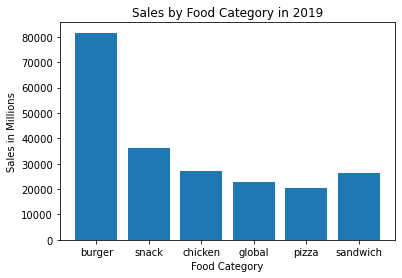

In [3]:
#total revenue per category of place
food_category=["burger", "snack", "chicken", "global", "pizza", "sandwich"]
rev_sum = []

 
for i in range(len(food_category)):
    mask = rest_rev['category']==food_category[i] 
    fc = rest_rev[mask] #using masking to loop through the different food categorys
    x = fc['sales_in_millions_2019'].sum()
    rev_sum.append(x)


plt.bar(food_category,rev_sum)
plt.xlabel('Food Category')
plt.ylabel('Sales in Millions')
plt.title('Sales by Food Category in 2019')
plt.show()

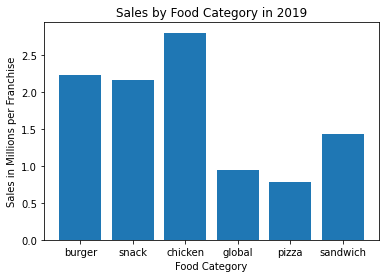

In [4]:
#This shows the revenue per type of category divided by the amount of franchises
#This then gives us the amount of sales in millions per franchise showing a better representation of how successful they are individually
#this is a simpler way that I used and it shows the sales in millions per franchise
sales_per_franchise = (rest_rev.groupby('category').sum()['sales_in_millions_2019'])/(rest_rev.groupby('category').sum()['franchised_units_2019'])
plt.bar(food_category,sales_per_franchise)
plt.xlabel('Food Category')
plt.ylabel('Sales in Millions per Franchise')
plt.title('Sales by Food Category in 2019')
plt.show()

Sales means the total amounts of goods and services sold in a given period. When looking at what makes up the costs of a typical fast food chain we see that Labor, Food (or supplies), and rent are the three major costs. 

In [5]:
#are looking at the labor costs
# add a new column with ranks
top_ff_wages = pd.read_csv('Fast Food Wages.csv')
top_ff_wages['Rank'] = top_ff_wages[' Average Wage '].rank(ascending=False)

# sort the dataframe by the rank column
top_ff_wages = top_ff_wages.sort_values('Rank')

food_category=["burger", "snack", "chicken", "global", "pizza", "sandwich"]
avg_wage = []

#this gives the mean of each wage
for i in range(len(food_category)):
    mask = top_ff_wages[' food category '] == food_category[i] 
    fc = top_ff_wages[mask] #using masking to loop through the different food categorys
    x = fc[' Average Wage '].mean()
    avg_wage.append(x)
avg_wage



amount_above_avg_wage = []
# iterate over each amount and divide by 12 which is the average median wage paid for low or minimum wage workers
for j in avg_wage:
    amount_above_avg_wage.append((j / 12)) #whatever amount over that is how much we scale up the labor costs or scale down by
amount_above_avg_wage

#multiplies the 23% of total revenue cost of labor cost by the revenue for each type of fast food resturant
combined_list = []
for element in rev_sum:
    combined_list.append((element * 0.23))

#multiplies the labor cost of 23% by the amount that type of restaurant pays their employees
profit_minus_labor_costs = []
for i in range(len(combined_list)):
    profit_minus_labor_costs.append(combined_list[i] * amount_above_avg_wage[i])
print(profit_minus_labor_costs)

# iterate over the indices of both lists and combine the elements
combo_list=[]
for i in range(len(profit_minus_labor_costs)):
    combo_list.append((food_category[i], profit_minus_labor_costs[i]))
print(combo_list)



[18762.938850000002, 9171.293444444444, 6085.424333333333, 5688.802270833335, 5098.6489125, 6955.702933333334]
[('burger', 18762.938850000002), ('snack', 9171.293444444444), ('chicken', 6085.424333333333), ('global', 5688.802270833335), ('pizza', 5098.6489125), ('sandwich', 6955.702933333334)]


We want to subtract some operational costs for different resturants because some are easier to run with less equipment
This is just from my own research
If 35% is the mean cost then for 
["burger", "snack", "chicken", "global", "pizza", "sandwich"]
-Burger: we will say it is probably right around 35%
-Snack: it would be a bit less 33%, rent would be less and the equipment isnt as in depth
-Chicken: 35%
-Global: 35%
-Pizza: 35%
-Sandwich: 32% because of a lot less operational costs and rent of smaller spaces

In [6]:
operational_percent = [0.35, 0.33, 0.35, 0.35, 0.35, 0.32]
# list1 = [0.35, 0.33, 0.35, 0.35, 0.35, 0.32]
# list2 = [81612, 36296, 27160, 22805, 20361, 26374]

operational_percentage_for_each_restaurant = []
for i in range(len(operational_percent)):
    result = operational_percent[i] * rev_sum[i]
    operational_percentage_for_each_restaurant.append(result)
#operational_percentage_for_each_restaurant

#need to remember to take out food costs
food_cost_list = []
for x in rev_sum:
    food_cost = x * 0.35
    food_cost_list.append(food_cost)
#food_cost_list

Now to add all the costs together and then subtract them from the revenue for each type of resturant

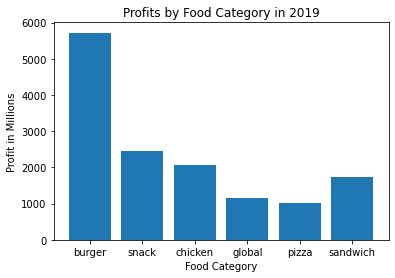

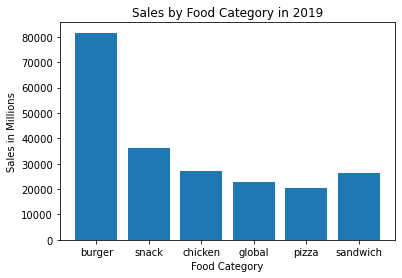

In [7]:
#revenue - the costs
profit_list=[]
for i in range(len(rev_sum)):
    profit = rev_sum[i]-operational_percentage_for_each_restaurant[i]-profit_minus_labor_costs[i]-food_cost_list[i]
    profit_list.append(profit)
profit_list

#now we can look at the estimated profits based on my reasoning above
plt.bar(food_category, profit_list)
plt.xlabel('Food Category')
plt.ylabel('Profit in Millions')
plt.title('Profits by Food Category in 2019')
plt.show()

plt.bar(food_category,rev_sum)
plt.xlabel('Food Category')
plt.ylabel('Sales in Millions')
plt.title('Sales by Food Category in 2019')
plt.show()


For the most part the sales and profits look similar in terms of comparing the different companies to each other. The differences are that resturants classified as snack places like dunkin donuts or starbucks have a higher profit than shown in the sales portion. The sandwich resturants also have higher profit than sales when looking at the difference between them and the rest of the food categories. This could be as a result of lower operational or labor costs.

In [8]:
unit_change = pd.read_csv('2020 Fast Food Unit Change.csv')
unit_change = unit_change.drop('?', axis=1)
unit_change['TOTAL CHANGE IN UNITS FROM 2019'] = unit_change['TOTAL CHANGE IN UNITS FROM 2019'].str.replace(',', '').astype(float)
unit_change['TOTAL CHANGE IN UNITS FROM 2019'] = unit_change['TOTAL CHANGE IN UNITS FROM 2019'].astype(float)
unit_change['2020 TOTAL UNITS'] = unit_change['2020 TOTAL UNITS'].str.replace(',', '').astype(float)
unit_change['2020 TOTAL UNITS'] = unit_change['2020 TOTAL UNITS'].astype(float)
unit_change

,COMPANY,CATEGORY,2020 US SYSTEMWIDE SALES MILLIONS,2020 AVERAGE SALES PER UNIT THOUSANDS,2020 FRANCHISED UNITS,2020 COMPANY UNITS,2020 TOTAL UNITS,TOTAL CHANGE IN UNITS FROM 2019
0,MCDONALD'S,BURGER,"40,518","2,944","13,025",657,13682.0,-164.0
1,STARBUCKS*,SNACK,"18,750","1,235","6,387","8,941",15328.0,287.0
2,CHICK-FIL-A*,CHICKEN,"12,800","5,013","2,589",18,2607.0,107.0
3,TACO BELL,GLOBAL,"11,000","1,648","6,324",475,6799.0,33.0
4,WENDY'S,BURGER,"10,231","1,725","5,520",361,5881.0,29.0
5,BURGER KING,BURGER,"9,657","1,414","7,029",52,7081.0,-265.0
6,DUNKIN',SNACK,"8,762",930,"9,083",0,9083.0,-547.0
7,SUBWAY,SANDWICH,"8,318",375,"22,190",0,22190.0,-1612.0
8,DOMINO'S,PIZZA,"8,287","1,328","5,992",363,6355.0,229.0
9,CHIPOTLE,GLOBAL,"5,985","2,200",0,"2,750",2750.0,150.0


In [31]:
#this is the 2019 dataset
food_category=["burger", "snack", "chicken", "global", "pizza", "sandwich"]
food_Category=["BURGER",'SNACK',"CHICKEN","GLOBAL","PIZZA","SANDWICH"]
avg_rev_sum_unit_change_2019 = []
avg_rev_sum_unit_change_2020 = []

#avg change for each restaurant
for i in range(len(food_category)):
    mask = rest_rev['category']==food_category[i] 
    fc = rest_rev[mask] #using masking to loop through the different food categorys
    y = fc['unit_change_from_2018'].sum()/len(food_category[i])
    avg_rev_sum_unit_change_2019.append(y)
avg_rev_sum_unit_change_2019

for i in range(len(food_category)):
    mask = unit_change['CATEGORY']==food_Category[i] 
    fc = unit_change[mask] #using masking to loop through the different food categorys
    y = fc['TOTAL CHANGE IN UNITS FROM 2019'].sum()/len(food_category[i])
    avg_rev_sum_unit_change_2020.append(y)
avg_rev_sum_unit_change_2020

[-76.5, -60.2, 45.714285714285715, 40.166666666666664, -104.8, -194.75]

In [23]:
original_rest_amount_2019 = []
original_rest_amount_2020 = []
food_Category=["BURGER",'SNACK',"CHICKEN","GLOBAL","PIZZA","SANDWICH"]

for i in range(len(food_category)):
    mask = rest_rev['category']==food_category[i] 
    newfc = rest_rev[mask] #using masking to loop through the different food categorys
    new = newfc['total_units_2019'].sum()/len(food_category[i])
    original_rest_amount_2019.append(new)
original_rest_amount_2019

for i in range(len(food_Category)):
    mask = unit_change['CATEGORY']==food_Category[i] 
    newfc = unit_change[mask] #using masking to loop through the different food categorys
    new = newfc['2020 TOTAL UNITS'].sum()/len(food_Category[i])
    original_rest_amount_2020.append(new)
original_rest_amount_2020

[6799.333333333333, 6494.8, 2041.2857142857142, 2306.5, 4501.4, 4318.625]

In [37]:
from sklearn.linear_model import LinearRegression
change_2019_amount = [-1.0, 60.4, 54.42857142857143, 64.83333333333333, 14.0, -79.375]
change_2020_amount = [-76.5, -60.2, 45.714285714285715, 40.166666666666664, -104.8, -194.75]

category_change_data = []

for i in range(len(org_2019_amount)):
    category_change_data.append([change_2019_amount[i], change_2020_amount[i]])

print(category_change_data)

org_2019_amount = [6780.0, 6724.2, 1990.2857142857142, 2316.8333333333335, 4642.2, 4558.375]
org_2020_amount = [6799.333333333333, 6494.8, 2041.2857142857142, 2306.5, 4501.4, 4318.625]

category_org_data = []

for i in range(len(org_2019_amount)):
    category_org_data.append([org_2019_amount[i], org_2020_amount[i]])

print(category_org_data)

[[-1.0, -76.5], [60.4, -60.2], [54.42857142857143, 45.714285714285715], [64.83333333333333, 40.166666666666664], [14.0, -104.8], [-79.375, -194.75]]
[[6780.0, 6799.333333333333], [6724.2, 6494.8], [1990.2857142857142, 2041.2857142857142], [2316.8333333333335, 2306.5], [4642.2, 4501.4], [4558.375, 4318.625]]


In [62]:
#for burger the changes are below
x = np.array([-1.0, -76.5]).reshape((-1, 1))
y = np.array([6780.0, 6799.333333333333])

model = LinearRegression().fit(x, y)

# Predict future changes
future_rates = np.array([[6780.0],[6799.333333333333]])
future_changes = model.predict(future_rates)

# Print the predicted changes
for rate, change in zip(future_rates, future_changes):
    print(f"Predicted change for base rate {rate[0]}: {change:.2f}")

Predicted change for base rate 6780.0: 5043.58
Predicted change for base rate 6799.333333333333: 5038.63


In [61]:
#for snack
x = np.array([60.4, -60.2]).reshape((-1, 1))
y = np.array([6724.2, 6494.8])

model = LinearRegression().fit(x, y)

# Predict future changes
future_rates = np.array([[6724.2],[6494.8]])
future_changes = model.predict(future_rates)

# Print the predicted changes
for rate, change in zip(future_rates, future_changes):
    print(f"Predicted change for base rate {rate[0]}: {change:.2f}")

Predicted change for base rate 6724.2: 19399.79
Predicted change for base rate 6494.8: 18963.43


In [60]:
#for chicken
x = np.array([54.42857142857143, 45.714285714285715]).reshape((-1, 1))
y = np.array([1990.2857142857142, 2041.2857142857142])

model = LinearRegression().fit(x, y)

# Predict future changes
future_rates = np.array([[1990.2857142857142],[2041.2857142857142]])
future_changes = model.predict(future_rates)

# Print the predicted changes
for rate, change in zip(future_rates, future_changes):
    print(f"Predicted change for base rate {rate[0]}: {change:.2f}")

Predicted change for base rate 1990.2857142857142: -9339.24
Predicted change for base rate 2041.2857142857142: -9637.71


In [59]:
#for global
x = np.array([64.83333333333333, 40.166666666666664]).reshape((-1, 1))
y = np.array([2316.8333333333335, 2306.5])

model = LinearRegression().fit(x, y)

# Predict future changes
future_rates = np.array([[2316.8333333333335],[2306.5]])
future_changes = model.predict(future_rates)

# Print the predicted changes
for rate, change in zip(future_rates, future_changes):
    print(f"Predicted change for base rate {rate[0]}: {change:.2f}")

Predicted change for base rate 2316.8333333333335: 3260.24
Predicted change for base rate 2306.5: 3255.91


In [64]:
#for pizza
x = np.array([14.0, -104.8]).reshape((-1, 1))
y = np.array([4642.2, 4501.4])

model = LinearRegression().fit(x, y)

# Predict future changes
future_rates = np.array([[4642.2],[4501.4]])
future_changes = model.predict(future_rates)

# Print the predicted changes
for rate, change in zip(future_rates, future_changes):
    print(f"Predicted change for base rate {rate[0]}: {change:.2f}")

Predicted change for base rate 4642.2: 10127.47
Predicted change for base rate 4501.4: 9960.60


In [63]:
#for sandwich
x = np.array([-79.375, -194.75]).reshape((-1, 1))
y = np.array([4558.375, 4318.625])

model = LinearRegression().fit(x, y)

# Predict future changes
future_rates = np.array([[4558.375], [4318.625]])
future_changes = model.predict(future_rates)

# Print the predicted changes
for rate, change in zip(future_rates, future_changes):
    print(f"Predicted change for base rate {rate[0]}: {change:.2f}")

Predicted change for base rate 4558.375: 14195.65
Predicted change for base rate 4318.625: 13697.45


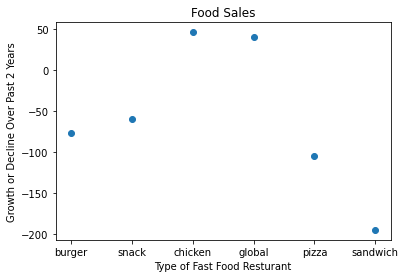

[-76.5, -60.2, 45.714285714285715, 40.166666666666664, -104.8, -194.75]

In [99]:
#look at the increase or decrease of resturants from past 2 years
food_Category=["BURGER",'SNACK',"CHICKEN","GLOBAL","PIZZA","SANDWICH"]
rev_sum_unit_change_2020 = []

#this is 2020 dataset
for i in range(len(food_Category)):
    mask = unit_change['CATEGORY']==food_Category[i] 
    fcc = unit_change[mask] #using masking to loop through the different food categorys
    c = fcc['TOTAL CHANGE IN UNITS FROM 2019'].sum()/len(food_Category[i])
    rev_sum_unit_change_2020.append(c)
rev_sum_unit_change_2020

unit_change_over_two_years = rev_sum_unit_change_2020 + rev_sum_unit_change_2019 #combine the two years franchise unit change

combo_list_mag_change=[]
for i in range(len(profit_minus_labor_costs)):
    combo_list_mag_change.append((food_category[i], unit_change_over_two_years[i]))
combo_list_mag_change

x = [d[0] for d in combo_list_mag_change]
y = [d[1] for d in combo_list_mag_change]

plt.scatter(x, y)

plt.xlabel('Type of Fast Food Resturant')
plt.ylabel('Growth or Decline Over Past 2 Years')
plt.title('Food Sales')

plt.show()

rev_sum_unit_change_2020

# X = data[['base_rate']]
# y = data['change']
# model = LinearRegression().fit(X, y)

# # Predict future changes
# future_rates = np.array([[7000], [7500], [8000]])
# future_changes = model.predict(future_rates)

# # Plot the data points and the regression line
# plt.scatter(X, y)
# plt.plot(X, model.predict(X), color='red')
# plt.plot(future_rates, future_changes, 'o', color='green')
# plt.xlabel('Base rate')
# plt.ylabel('Change')
# plt.title('Restaurant changes')
# plt.show()

In [65]:
org_2019_amount = [6780.0, 6724.2, 1990.2857142857142, 2316.8333333333335, 4642.2, 4558.375]
org_2020_amount = [6799.333333333333, 6494.8, 2041.2857142857142, 2306.5, 4501.4, 4318.625]

category_org_data = []

for i in range(len(org_2019_amount)):
    category_org_data.append([org_2019_amount[i], org_2020_amount[i]])

print(category_org_data)

change_2019_amount = [6780.0, 6724.2, 1990.2857142857142, 2316.8333333333335, 4642.2, 4558.375]
change_2020_amount = [6799.333333333333, 6494.8, 2041.2857142857142, 2306.5, 4501.4, 4318.625]

category_org_data = []

for i in range(len(org_2019_amount)):
    category_org_data.append([org_2019_amount[i], org_2020_amount[i]])

print(category_org_data)

y = np.array([-1.0, 60.4, 54.42857142857143, 64.83333333333333, 14.0, -79.375])
x = category_org_data.reshape((-1, 1))

# Create a linear regression object
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Get the slope and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)

# Plot the data points and regression line
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.show()


[[6780.0, 6799.333333333333], [6724.2, 6494.8], [1990.2857142857142, 2041.2857142857142], [2316.8333333333335, 2306.5], [4642.2, 4501.4], [4558.375, 4318.625]]
[[6780.0, 6799.333333333333], [6724.2, 6494.8], [1990.2857142857142, 2041.2857142857142], [2316.8333333333335, 2306.5], [4642.2, 4501.4], [4558.375, 4318.625]]


AttributeError: 'list' object has no attribute 'reshape'

In [39]:

# Create a DataFrame with the given data
data = pd.DataFrame({'base_rate': [6799.333333333333, 6494.8, 2041.2857142857142, 2306.5, 4501.4, 4318.625],
                     'change': [-76.5, -60.2, 45.714285714285715, 40.166666666666664, -104.8, -194.75]})

# Train a linear regression model
X = data[['base_rate']]
y = data['change']
model = LinearRegression().fit(X, y)

# Predict future changes
future_rates = np.array([[7000], [7500], [8000]])
future_changes = model.predict(future_rates)

# Print the predicted changes
for rate, change in zip(future_rates, future_changes):
    print(f"Predicted change for base rate {rate[0]}: {change:.2f}")

Predicted change for base rate 7000: -121.85
Predicted change for base rate 7500: -134.11
Predicted change for base rate 8000: -146.36


/home/bulatjam/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


AVG MINIMUM WAGES FOR CATEGORIES

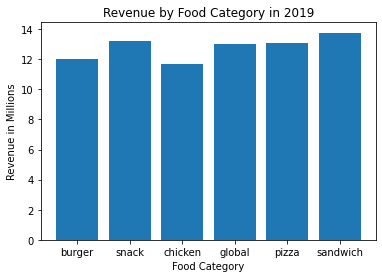

In [15]:
plt.bar(food_category, avg_wage)
plt.xlabel('Food Category')
plt.ylabel('Revenue in Millions')
plt.title('Revenue by Food Category in 2019')
plt.show()

LOCATION OF RESTAURANTS

In [5]:
#location data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import ma

#resturant locations
rest_loc = pd.read_csv('Datafiniti_Fast_Food_Restaurants_Jun19.csv')
rest_loc.drop(columns=['id', 'dateAdded', 'dateUpdated', 'keys', 'sourceURLs', 'websites'])




,address,categories,primaryCategories,city,country,latitude,longitude,name,postalCode,province
0,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Accommodation & Food Services,Greeley,US,40.396290,-104.696990,Carl's Jr.,80631,CO
1,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Resta...",Accommodation & Food Services,Grand Junction,US,39.081350,-108.586890,Del Taco,81505,CO
2,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restauran...",Accommodation & Food Services,Grand Junction,US,39.091480,-108.554110,Which Wich,81506,CO
3,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Aurora,US,39.763690,-104.776710,Chipotle Mexican Grill,80011,CO
4,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Rest...",Accommodation & Food Services,Denver,US,39.740440,-104.926360,Taco Bell,80220,CO
...,...,...,...,...,...,...,...,...,...,...
9995,1803 Carolina Ave,"American Restaurants,Caterers,Soul Food Restau...",Accommodation & Food Services,Bessemer,US,33.399574,-86.951050,Church's Chicken Of Birmingham,35020,AL
9996,8511 Cantilever Way Ste 105,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Accommodation & Food Services,Raleigh,US,35.884500,-78.737541,Luxury Box,27613-6996,NC
9997,2601 Plover Rd,"Carry-out food,Hot dog restaurants,Fast Food R...",Accommodation & Food Services,Plover,US,44.453180,-89.543170,McDonald's,54467,WI
9998,170 E Main St,"Carry-out food,Caterers,Restaurant delivery se...",Accommodation & Food Services,Hendersonville,US,36.308262,-86.607339,Pizza Hut,37075,TN


In [26]:

first_longitude = (rest_loc['longitude']>=-125.0) & (rest_loc['longitude']<-110.0) #this is longitudes every 15 longitudes
first_longitude = rest_loc[first_longitude]
first_longitude.drop(columns=['id', 'dateAdded', 'dateUpdated', 'keys', 'sourceURLs', 'websites'])
first_name_list =  list(first_longitude["name"])
len(first_name_list)

1907

In [27]:
second_longitude = (rest_loc['longitude']>=-110.0) & (rest_loc['longitude']<-95.0)
second_longitude = rest_loc[second_longitude]
second_longitude.drop(columns=['id', 'dateAdded', 'dateUpdated', 'keys', 'sourceURLs', 'websites'])
second_name_list =  list(second_longitude["name"])
len(second_name_list)

985

In [28]:
third_longitude = (rest_loc['longitude']>=-95.0) & (rest_loc['longitude']<-80.0)
third_longitude = rest_loc[third_longitude]
third_longitude.drop(columns=['id', 'dateAdded', 'dateUpdated', 'keys', 'sourceURLs', 'websites'])
third_name_list =  list(third_longitude["name"])
len(third_name_list)

5686

In [29]:
fourth_longitude = (rest_loc['longitude']>=-80.0) & (rest_loc['longitude']<-65.0)
fourth_longitude = rest_loc[fourth_longitude]
fourth_longitude.drop(columns=['id', 'dateAdded', 'dateUpdated', 'keys', 'sourceURLs', 'websites'])
fourth_name_list =  list(fourth_longitude["name"])
len(fourth_name_list)

1267

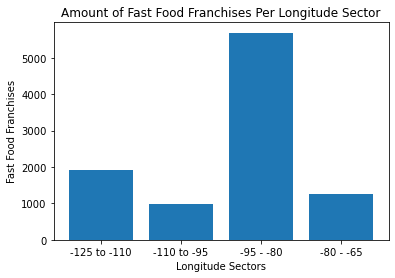

In [33]:
Amount_of_Restaurants = [1907,985,5686,1267]
Sections_of_Longitude= ['-125 to -110', '-110 to -95','-95 - -80','-80 - -65']
plt.bar(Sections_of_Longitude, Amount_of_Restaurants)
plt.xlabel('Longitude Sectors')
plt.ylabel('Fast Food Franchises')
plt.title('Amount of Fast Food Franchises Per Longitude Sector')
plt.show()

Looking at the data above dividing the USA into different sections of longitiude we can see that the third section of longitude from -95 to -80 is where the majority of the fast food chains are